<a href="https://colab.research.google.com/github/huycao117/NTC-Pre-selected-UW/blob/master/huydeptrai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded successfully!
ID column not found.
Unpaid_CO_84M  column not found.

--- EDA: Exploring Credit Risk Data ---

1. Credit Risk Concept and Calculation:
Credit risk is the possibility of a borrower failing to repay a loan or meet their debt obligations. It's a crucial concern for lenders as it directly impacts their profitability.
Credit risk assessment often involves evaluating a borrower's creditworthiness based on factors like credit history, repayment capacity, income, loan terms, and collateral.
Quantifying credit risk can involve calculating metrics such as:
- Probability of Default (PD%): The likelihood that a borrower will default on their debt.
- Net Credit Loss ($NCL%): The total amount the lender is at risk for at the time of default.

2. Exploring the Credit Data:

First, let's get a general overview of the data:
   No_Hit   FICO  Age  Ev

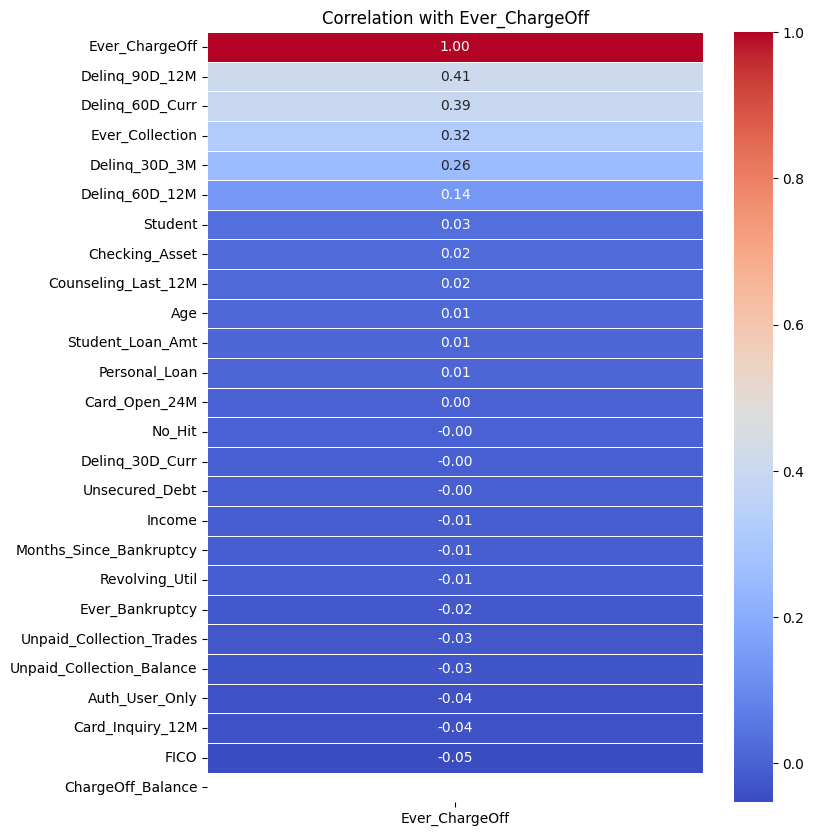


Correlation Table with ChargeOff_Balance:
                           ChargeOff_Balance
ChargeOff_Balance                   1.000000
Delinq_30D_Curr                     0.419308
Personal_Loan                       0.211872
Age                                 0.181042
Card_Inquiry_12M                    0.176482
Unsecured_Debt                      0.137715
Revolving_Util                      0.021644
Counseling_Last_12M                -0.072106
Delinq_30D_3M                      -0.091889
Income                             -0.094192
Card_Open_24M                      -0.102356
No_Hit                             -0.107548
Unpaid_Collection_Balance          -0.107548
Unpaid_Collection_Trades           -0.107548
Delinq_60D_Curr                    -0.111059
Delinq_90D_12M                     -0.180267
Checking_Asset                     -0.209337
Auth_User_Only                     -0.224695
FICO                               -0.251814
Student_Loan_Amt                   -0.304616
Delinq_60D_1

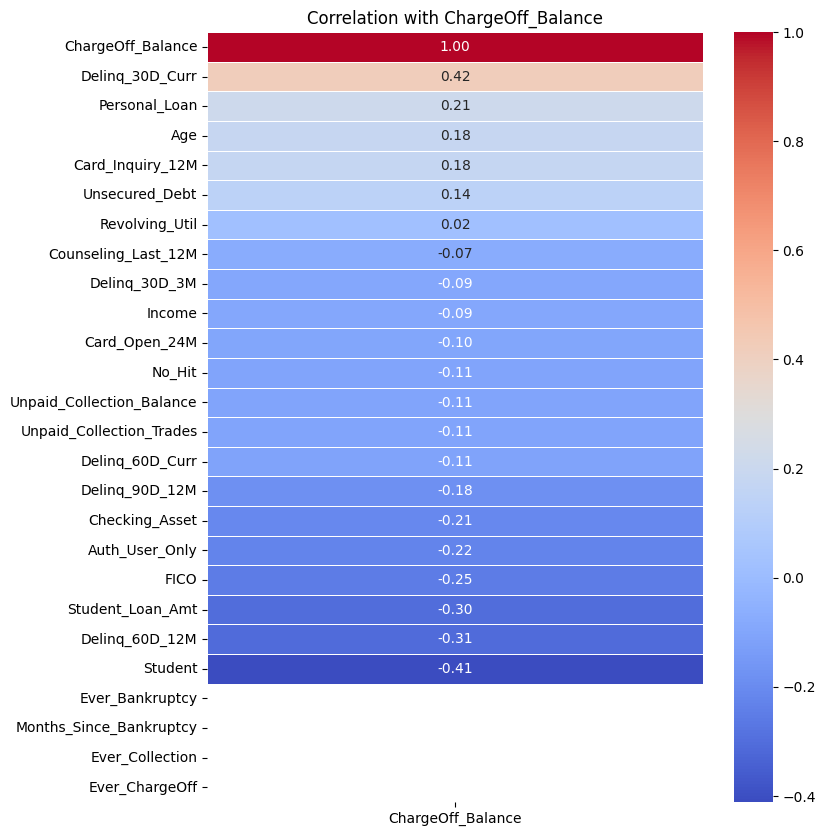

ChargeOff_Balance column dropped.

4. Outliers in Credit Data:

Outliers are data points that significantly deviate from the rest of the data. In credit data, outliers can represent unusual applicant profiles or errors in data entry. They can skew statistical analyses and affect machine learning model performance.

5. Finding Outliers with Cross Tables:

While cross tables primarily show relationships between categorical variables, unusual distributions within categories might hint at outliers in related numerical variables.
For example, if a specific category has a very high or low average loan amount compared to others, it could indicate potential outliers.
\ Value Frequency of Binary Columns:

Value counts for binary column 'No_Hit':
No_Hit
0    1144
1     856
Name: count, dtype: int64

Value counts for binary column 'Ever_Bankruptcy':
Ever_Bankruptcy
0    1968
1      32
Name: count, dtype: int64

Value counts for binary column 'Ever_Collection':
Ever_Collection
0    1705
1     295


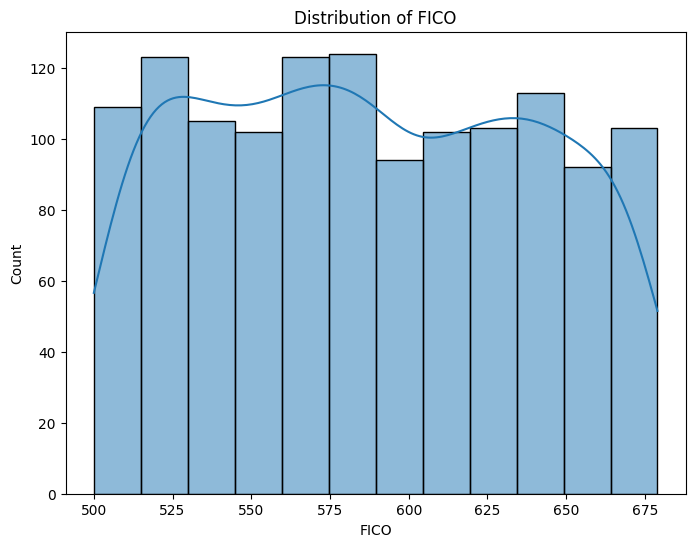

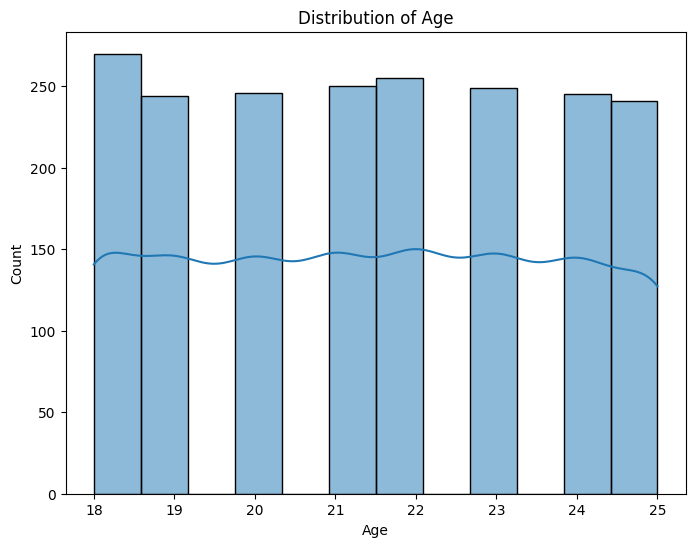


Skipping box plot for 'Ever_Bankruptcy' as it is binary.


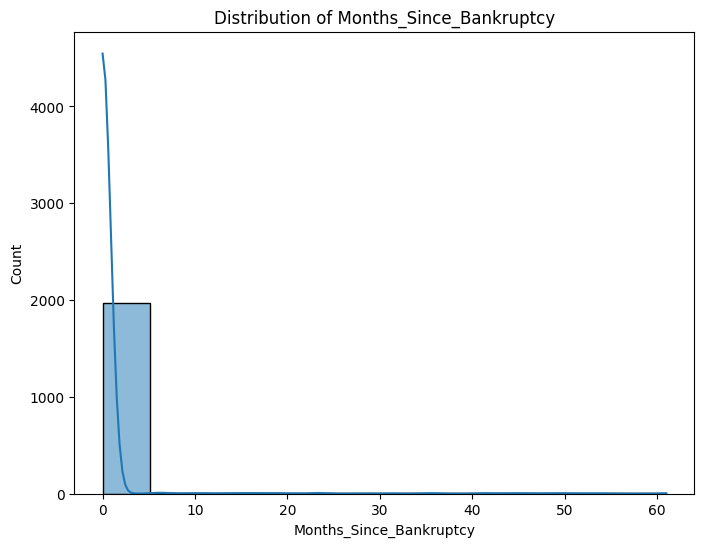


Skipping box plot for 'Ever_Collection' as it is binary.


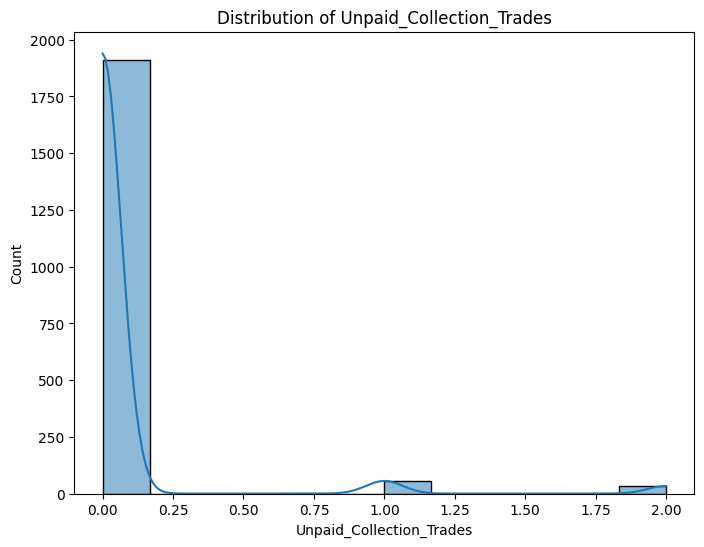

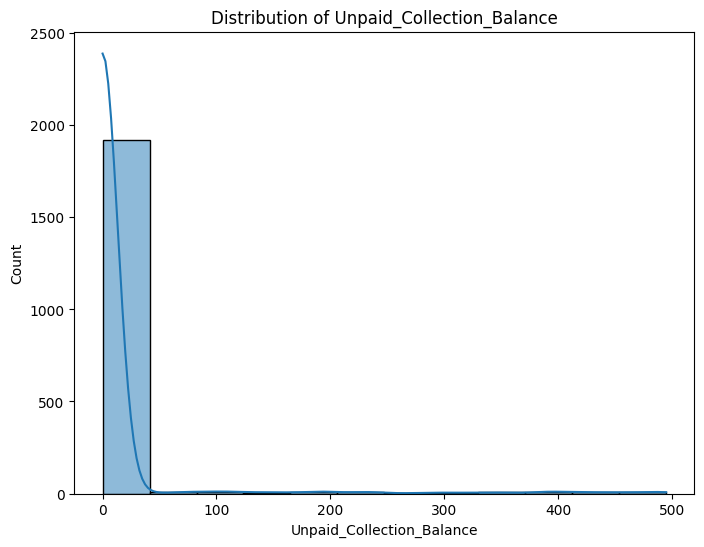


Skipping box plot for 'Counseling_Last_12M' as it is binary.

Skipping box plot for 'Delinq_90D_12M' as it is binary.

Skipping box plot for 'Delinq_60D_12M' as it is binary.

Skipping box plot for 'Delinq_60D_Curr' as it is binary.

Skipping box plot for 'Delinq_30D_3M' as it is binary.

Skipping box plot for 'Delinq_30D_Curr' as it is binary.


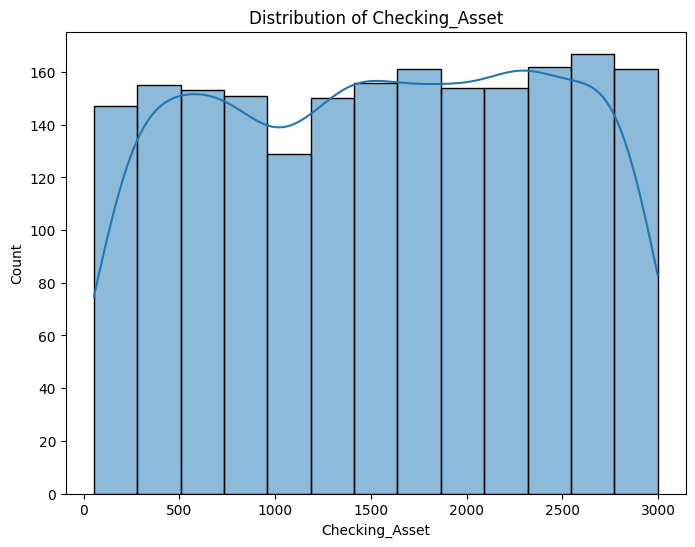

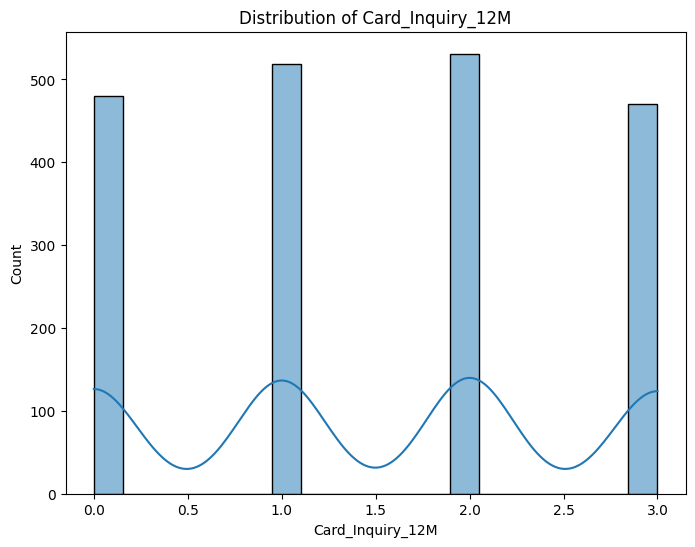

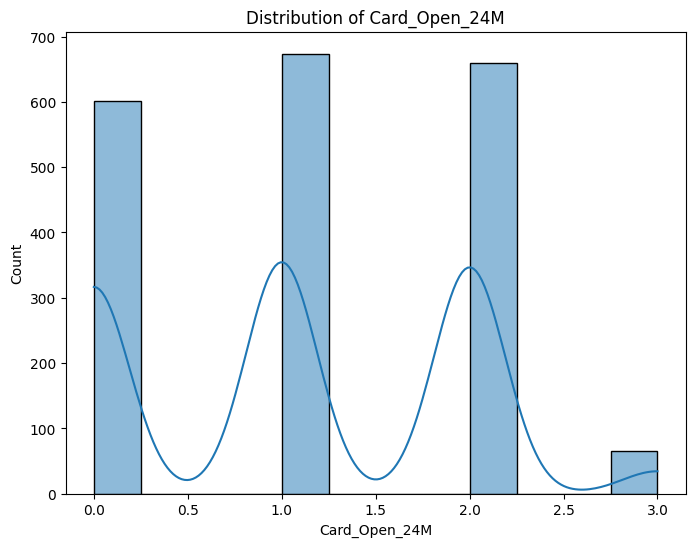


Skipping box plot for 'Personal_Loan' as it is binary.


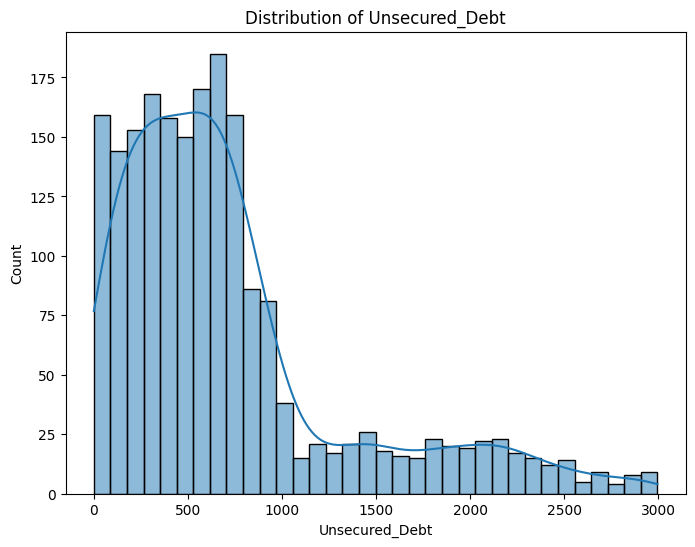

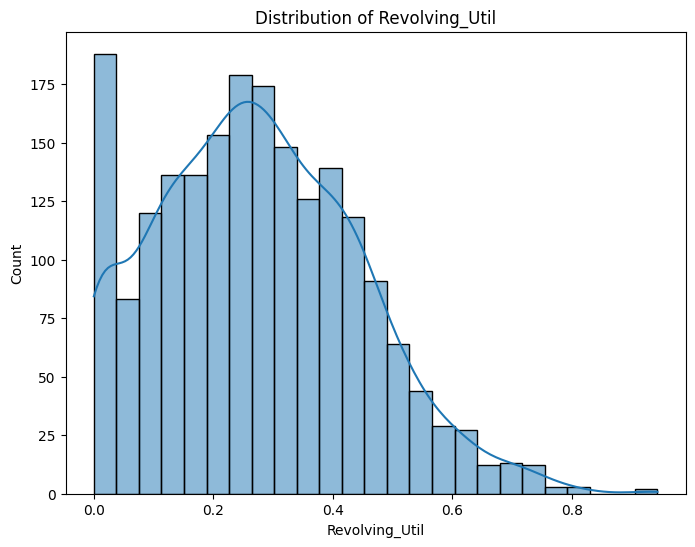

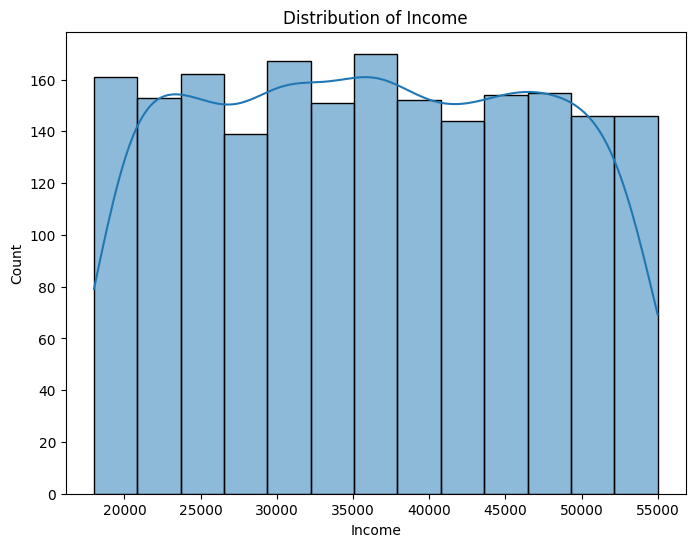


Skipping box plot for 'Auth_User_Only' as it is binary.

Skipping box plot for 'Student' as it is binary.


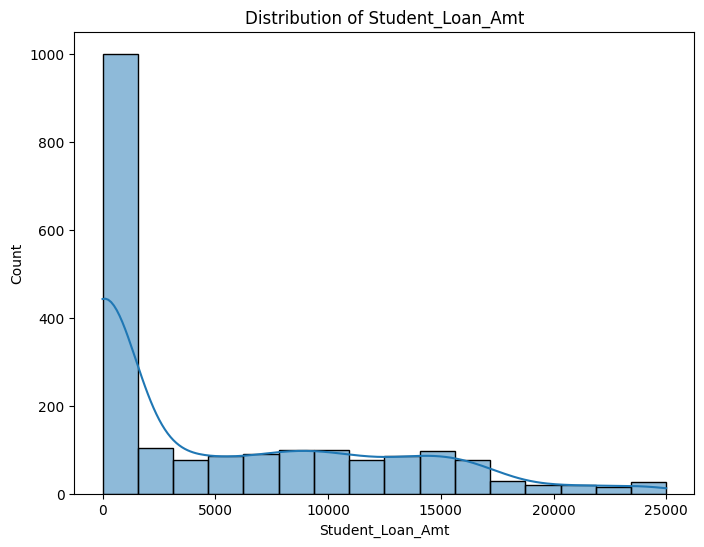


Skipping box plot for 'Ever_ChargeOff' as it is binary.


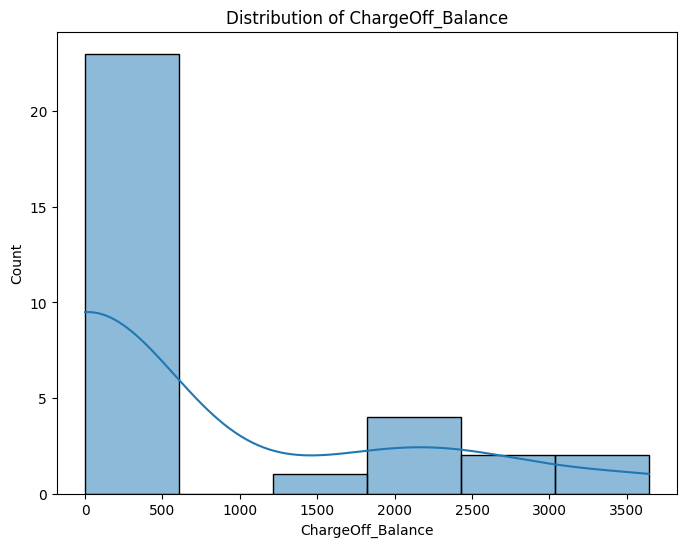

\For column with null values like FICO, the histogram only distibution for populated values
\Histogram is great to give overview for how values are distributed, but need 1.5Q Method to effetively identify outliner

6.Identifying Outliers using IQR Method (Non-Binary Columns):

Skipping IQR outlier detection for binary column 'No_Hit'.

No significant outliers found in 'FICO' using IQR method.

No significant outliers found in 'Age' using IQR method.

Skipping IQR outlier detection for binary column 'Ever_Bankruptcy'.

Potential outliers in 'Months_Since_Bankruptcy' (IQR method):
49     23
74     13
84     55
118    17
179     9
Name: Months_Since_Bankruptcy, dtype: int64

Skipping IQR outlier detection for binary column 'Ever_Collection'.

Potential outliers in 'Unpaid_Collection_Trades' (IQR method):
38     1
58     1
74     2
108    1
143    1
Name: Unpaid_Collection_Trades, dtype: int64

Potential outliers in 'Unpaid_Collection_Balance' (IQR method):
38     120
58     445
74     346

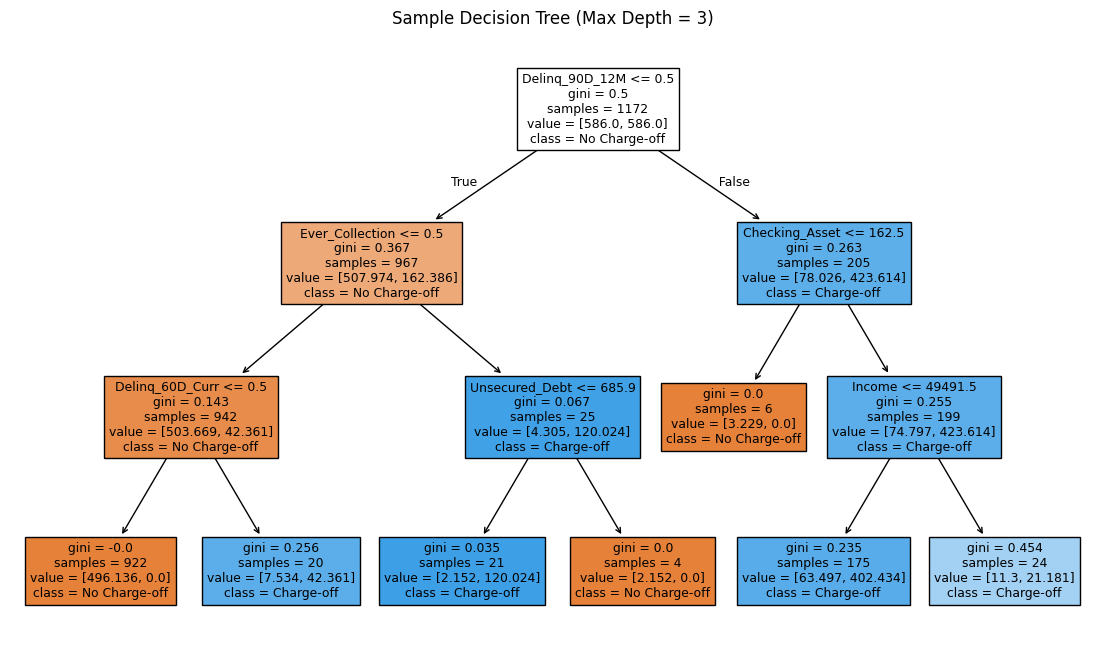


--- Validation Performance ---
[[209  23]
 [  7  12]]
              precision    recall  f1-score   support

           0      0.968     0.901     0.933       232
           1      0.343     0.632     0.444        19

    accuracy                          0.880       251
   macro avg      0.655     0.766     0.689       251
weighted avg      0.920     0.880     0.896       251

Validation AUC: 0.915


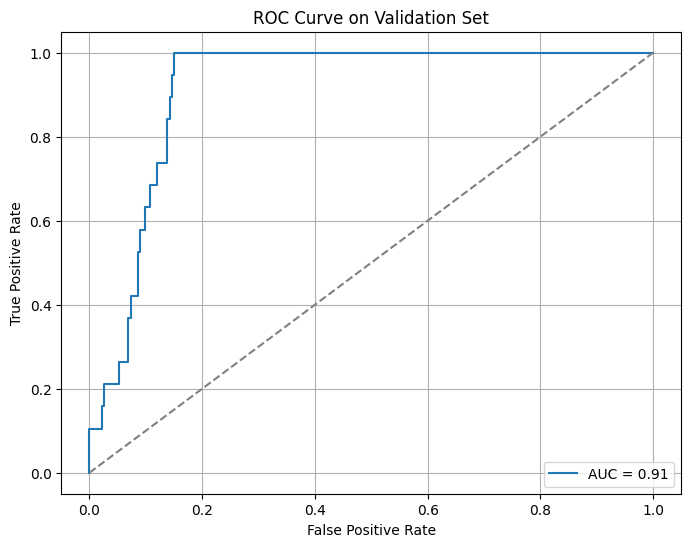


--- Test Set Performance ---
[[212  20]
 [  7  13]]
              precision    recall  f1-score   support

           0      0.968     0.914     0.940       232
           1      0.394     0.650     0.491        20

    accuracy                          0.893       252
   macro avg      0.681     0.782     0.715       252
weighted avg      0.922     0.893     0.904       252

Test AUC: 0.937
\As our intent of applying business acumen of prioritize detecting charge-off, our model with decent 60% Recall with test data, but in ex-change for a low precision and F-1, meaning we are auto-decline more people than trying to play risk with accepting them
\This model is suitable for business that have high tolerance in giving our extra manual review and. Our model working as designed


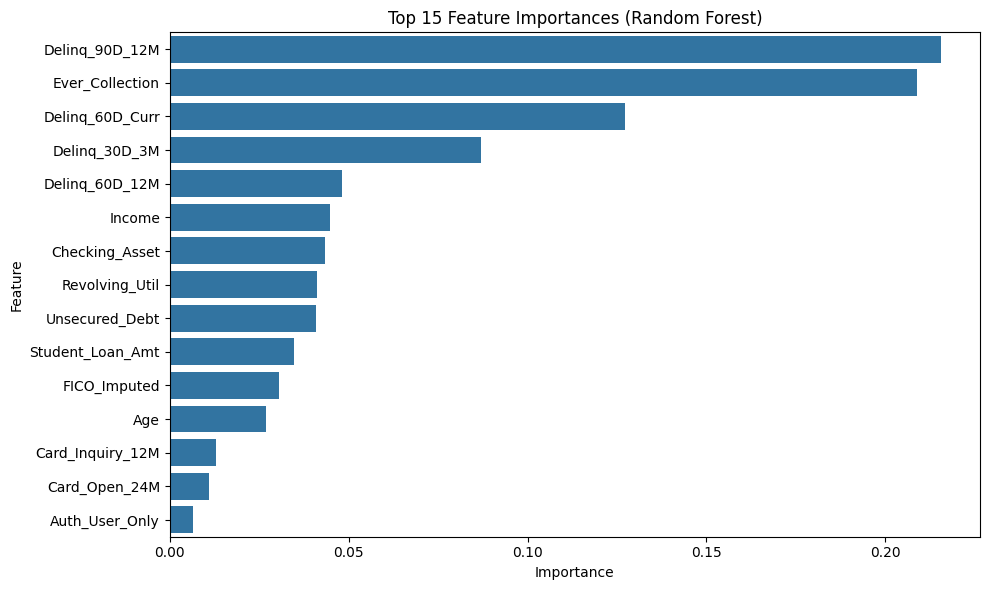


Value counts of cat


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:41:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost Validation Performance ---
Confusion Matrix:
[[221  11]
 [ 14   5]]

Classification Report:
              precision    recall  f1-score   support

           0      0.940     0.953     0.946       232
           1      0.312     0.263     0.286        19

    accuracy                          0.900       251
   macro avg      0.626     0.608     0.616       251
weighted avg      0.893     0.900     0.896       251

Validation AUC: 0.918


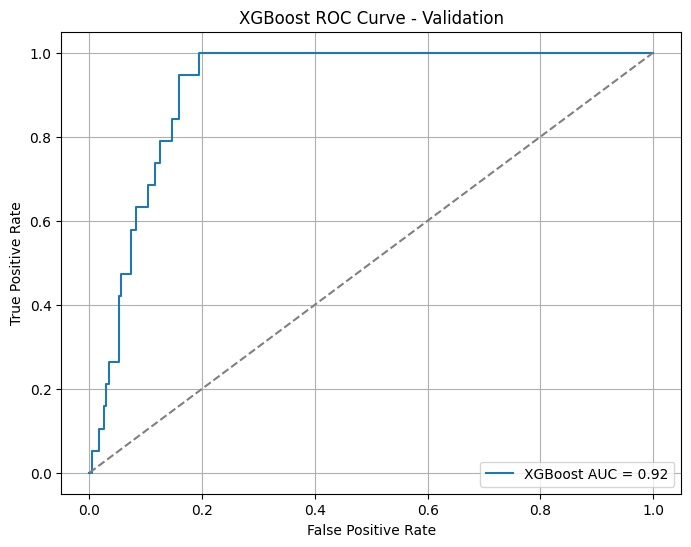


--- XGBoost Test Set Performance ---
Confusion Matrix:
[[225   7]
 [ 13   7]]

Classification Report:
              precision    recall  f1-score   support

           0      0.945     0.970     0.957       232
           1      0.500     0.350     0.412        20

    accuracy                          0.921       252
   macro avg      0.723     0.660     0.685       252
weighted avg      0.910     0.921     0.914       252

Test AUC: 0.943


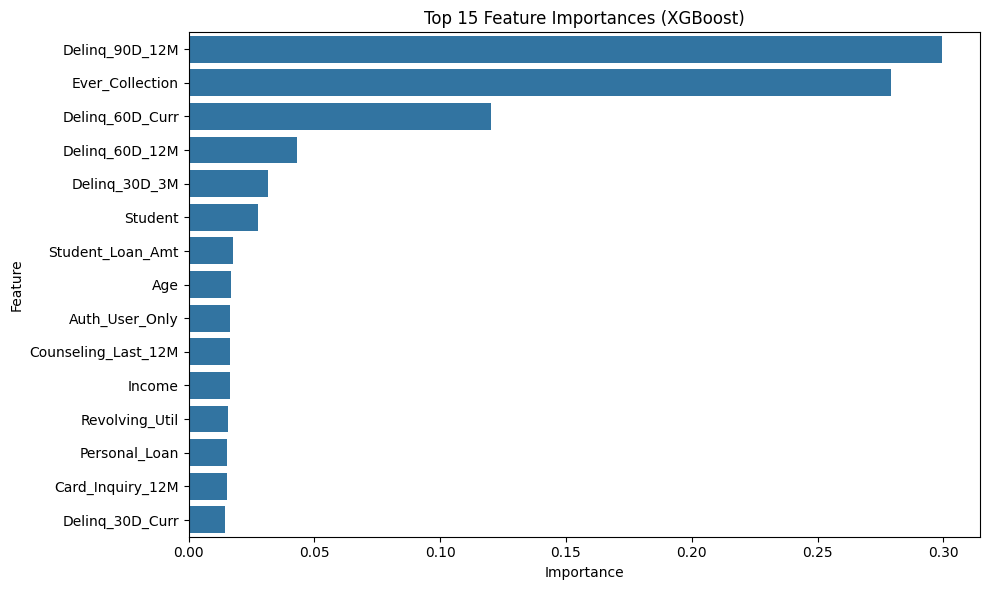

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
# Load the credit profile data
# df = pd.read_csv('/content/drive/MyDrive/Huy_ACE/Huy_Projects/v_credit_data_NTC_v51825.csv')
df = pd.read_csv('/content/test.csv')
print("Data loaded successfully!")

# Drop the ID column if it exists
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("ID column dropped.")
else:
    print("ID column not found.")
# Drop the ID column if it exists
if 'Unpaid_CO_84M ' in df.columns:
    df = df.drop('Unpaid_CO_84M ', axis=1)
    print("Unpaid_CO_84M  column dropped.")
else:
    print("Unpaid_CO_84M  column not found.")
# --- EDA Framework ---

# Set options to display all columns and a large number of rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("\n--- EDA: Exploring Credit Risk Data ---")

# 1. Discuss the concept of consumer credit risk and define how it is calculated.
print("\n1. Credit Risk Concept and Calculation:")
print("Credit risk is the possibility of a borrower failing to repay a loan or meet their debt obligations. It's a crucial concern for lenders as it directly impacts their profitability.")
print("Credit risk assessment often involves evaluating a borrower's creditworthiness based on factors like credit history, repayment capacity, income, loan terms, and collateral.")
print("Quantifying credit risk can involve calculating metrics such as:")
print("- Probability of Default (PD%): The likelihood that a borrower will default on their debt.")
print("- Net Credit Loss ($NCL%): The total amount the lender is at risk for at the time of default.")

# 2. Explore the credit data
print("\n2. Exploring the Credit Data:")
print("\nFirst, let's get a general overview of the data:")
print(df.head())
print("\nDataframe information:")
df.info()
print("\nSummary statistics of numerical features:")
print("\df.describe())egorical features:")
for column in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for column '{column}':")
    print(df[column].value_counts())

# 3. Crosstab and pivot tables with two target variables
print("\n3. Correlation Heatmaps with Target Variables Ever_ChargeOff and ChargeOff_Balance:")
print("\nTo simplify the analysis of correlations, we will generate two heatmaps showing the correlation of all numerical variables with each of the target variables.")

target_binary = 'Ever_ChargeOff'
target_continuous = 'ChargeOff_Balance'

numerical_df = df.select_dtypes(include=np.number).copy()

# Correlation with Ever_ChargeOff
correlation_with_ever_chargeoff = numerical_df.corr()[target_binary].sort_values(ascending=False)

# Display the correlation table for Ever_ChargeOff
print("\nCorrelation Table with Ever_ChargeOff:")
print(correlation_with_ever_chargeoff.to_frame())

# Correlation heatmap for Ever_ChargeOff
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_ever_chargeoff.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation with Ever_ChargeOff')
plt.show()

# Correlation with ChargeOff_Balance
correlation_with_chargeoff_balance = numerical_df.corr()[target_continuous].sort_values(ascending=False)

# Display the correlation table for ChargeOff_Balance
print("\nCorrelation Table with ChargeOff_Balance:")
print(correlation_with_chargeoff_balance.to_frame())

# Correlation heatmap for ChargeOff_Balance
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_chargeoff_balance.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation with ChargeOff_Balance')
plt.show()

# Drop the ChargeOff_Balance column if it exists due to abnormal high miss-match of Ever_ChargeOff and ChargeOff_Balance
if 'ChargeOff_Balance' in df.columns:
    df = df.drop('ChargeOff_Balance', axis=1)
    print("ChargeOff_Balance column dropped.")
else:
    print("ChargeOff_Balance column not found.")

# 4. Outliers in credit data
print("\n4. Outliers in Credit Data:")
print("\nOutliers are data points that significantly deviate from the rest of the data. In credit data, outliers can represent unusual applicant profiles or errors in data entry. They can skew statistical analyses and affect machine learning model performance.")

# 5. Finding outliers with cross tables
print("\n5. Finding Outliers with Cross Tables:")
print("\nWhile cross tables primarily show relationships between categorical variables, unusual distributions within categories might hint at outliers in related numerical variables.")
print("For example, if a specific category has a very high or low average loan amount compared to others, it could indicate potential outliers.")

print("\ Value Frequency of Binary Columns:")
for column in df.columns:
    if df[column].nunique() == 2:
        print(f"\nValue counts for binary column '{column}':")
        print(df[column].value_counts())
print("\Some noticeable insight: 1.4% went bankruptcy before, 20% ever collection, meanwhile, 14%.1 ever charge-off, reasonable for NTC, young adult")

print("\Examining Distributions with Histograms and KDE Plots:")
for column in numerical_df.columns:
  if numerical_df[column].nunique() > 2:
     plt.figure(figsize=(8, 6))
     sns.histplot(numerical_df[column], kde=True)
     plt.title(f'Distribution of {column}')
     plt.show()
  else:
      print(f"\nSkipping box plot for '{column}' as it is binary.")


print("\For column with null values like FICO, the histogram only distibution for populated values")

print("\Histogram is great to give overview for how values are distributed, but need 1.5Q Method to effetively identify outliner")
print("\n6.Identifying Outliers using IQR Method (Non-Binary Columns):")
for column in numerical_df.columns:
    if numerical_df[column].nunique() > 2:
        Q1 = numerical_df[column].quantile(0.25)
        Q3 = numerical_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numerical_df[column][(numerical_df[column] < lower_bound) | (numerical_df[column] > upper_bound)]
        if not outliers_iqr.empty:
            print(f"\nPotential outliers in '{column}' (IQR method):\n{outliers_iqr.head()}") # head function only shows 5 examples of the outliners
        else:
            print(f"\nNo significant outliers found in '{column}' using IQR method.")
    else:
        print(f"\nSkipping IQR outlier detection for binary column '{column}'.")

print("\n7. Removing Outliers (IQR Method, Non-Binary Columns):")
original_row_count = len(df)
rows_removed_per_column = {}
df_cleaned = df.copy()  # Create a copy of the DataFrame to avoid modifying the original during iteration

# 'Ever_ChargeOff' is our target and 'Unpaid_Collection_Trades' has a limited range (0-3)
exclude_cols_outlier = ['Unpaid_Collection_Trades', 'Ever_ChargeOff', 'ChargeOff_Balance']

# Iterate through columns in numerical_df that are NOT in the exclude list
# This is the corrected loop structure:
for column in numerical_df.columns:
    if column in exclude_cols_outlier:
        print(f"\nSkipping outlier removal for explicitly excluded column: '{column}'.")
        continue # Skip to the next column in the loop

    # Now apply your existing logic for outlier removal if not excluded and not binary
    if df_cleaned[column].nunique() > 2: # Use df_cleaned here as it's the one being modified
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        outlier_indices = df_cleaned[outliers_mask].index
        rows_removed = len(outlier_indices)

        if rows_removed > 0:
            df_cleaned = df_cleaned.drop(outlier_indices)
            rows_removed_per_column[column] = rows_removed
            print(f"\nRemoved {rows_removed} rows with IQR outliers in column '{column}'.")
        else:
            print(f"\nNo IQR outliers found in column '{column}'.")
    else:
        print(f"\nSkipping outlier removal for binary column '{column}'.")


print(f"\n--- Summary of Rows Removed ---")
total_rows_removed = original_row_count - len(df_cleaned)
print(f"Original number of rows: {original_row_count}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")
print(f"Total number of rows removed: {total_rows_removed}")
print("\nRows removed per column (if any):")
for column, count in rows_removed_per_column.items():
    print(f"- '{column}': {count}")

print("\nCleaned DataFrame (first 5 rows):")
print(df_cleaned.head())

# 7. Risk with missing data in loan data
print("\n8. Risk with Missing Data in Loan Data:")
print("\nMissing data is a common problem in real-world datasets. In loan data, missing values can introduce bias and reduce the accuracy of analyses and models.")
print("The risk associated with missing data depends on the extent and pattern of missingness. For example:")
print("- Missing values in crucial features like income or credit score can significantly impact credit risk assessment.")
print("- If missingness is systematic (related to other variables), it can introduce bias.")
print("- High percentages of missing values in a column might render machine learning model prediction feature unreliable.")

# 8. Replacing missing credit data
print("\n9. Replacing Missing Credit Data:")
print("\nSeveral techniques can be used to handle missing data:")
print("- Imputation: Filling missing values with estimated values (e.g., mean, median, mode).")
print("- More sophisticated imputation techniques (e.g., using machine learning models).")

print("\nLet's check for missing values:")
print(df.isnull().sum().sort_values(ascending=False))


from sklearn.model_selection import train_test_split


# Assuming your DataFrame after cleaning is named 'df_cleaned'

print("\n10. Split data into Train, Validation, and Test Data:")

# Split the data into training, validation, and test sets
train_df, temp_df = train_test_split(df_cleaned, test_size=0.3, random_state=42) # 30% go to validation-test, 70% remain for training
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)     #break-down 50/50 of 30% for validation and test

print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {val_df.shape}")
print(f"Test data shape: {test_df.shape}")

print("\n--- Explanation of Data Splitting ---")
print("""
We split our data into three distinct datasets: training, validation, and test. This is a fundamental practice in machine learning to build robust and reliable models.

**1. Training Data:**
   - This is the largest portion of our data and the one that the machine learning model directly learns from.
   - The model will adjust its internal parameters based on the patterns and relationships it finds in the training data.
   - Think of it as the 'textbook' the model studies to understand the underlying concepts.

**2. Validation Data:**
   - This dataset is used to tune the model's hyperparameters and to get an unbiased estimate of the model's performance *during* the training process.
   - Hyperparameters are settings of the model that are not learned from the data but are set prior to training (e.g., the learning rate of an algorithm, the depth of a decision tree).
   - By evaluating the model on the validation set after each training epoch or after trying different hyperparameter settings, we can see how well the model generalizes to unseen data and avoid overfitting (where the model learns the training data too well and performs poorly on new data).
   - The validation set acts as a 'practice exam' that helps us make adjustments to the model before the final evaluation.

**3. Test Data:**
   - This is a completely separate dataset that the model *never* sees during the training or hyperparameter tuning phases.
   - It serves as the final, unbiased evaluation of the model's performance on completely new, unseen data.
   - The test set simulates how well the model would perform in a real-world scenario.
   - We only evaluate the model on the test set *once*, after we have finalized our model through training and validation.
   - Think of the test set as the 'final exam' that gives us a true measure of the model's capabilities.

By using this three-way split, we can build a model that not only learns from the data but also generalizes well to new data and provides a reliable estimate of its real-world performance.
""")

# Impute missing FICO in the training data with a special value (e.g., 0)
special_fico_value = 999
train_df['FICO_Imputed'] = train_df['FICO'].fillna(special_fico_value).astype(int)

# Verify the imputation in the training data
print("\nMissing FICO values in training data before imputation:", train_df['FICO'].isnull().sum())
print("Missing FICO values in training data after imputation:", train_df['FICO_Imputed'].isnull().sum())
print("First few rows of training data with imputed FICO:")
print(train_df[['FICO', 'FICO_Imputed', 'No_Hit']].head())

# For demonstration, let's also do the same for validation and test sets *independently*
# In a real project, you would apply the *same* special value to these as well.
val_df['FICO_Imputed'] = val_df['FICO'].fillna(special_fico_value).astype(int)
test_df['FICO_Imputed'] = test_df['FICO'].fillna(special_fico_value).astype(int)

print("\nMissing FICO values in validation data after imputation:", val_df['FICO_Imputed'].isnull().sum())
print("Missing FICO values in test data after imputation:", test_df['FICO_Imputed'].isnull().sum())

# now check Ever_ChargeOff rate in train data
print("\ Value Frequency of Ever_ChargeOff in Train Data:")
for column in train_df.columns:
    if column == 'Ever_ChargeOff':
        print(f"\nValue counts for Ever_ChargeOff '{column}':")
        print(train_df[column].value_counts())
print("\Some noticeable insight:  17%.1 ever charge-off, reasonable for NTC, young adult")
# remember to check whether undersampling for training test is needed
# At 4%, we're in the moderate imbalance zone. No need to undersample — as 20% is isually considered as stastically important — but we still need to address imbalance through model-aware techniques.

###### END of EDA #######

###### --- MODELING: Predicting Ever_ChargeOff --- ######

print("\n=== Step 11: Building ML Model to Predict Ever_ChargeOff ===")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Drop target and non-informative columns
# Also drop FICO_V and No_Hit to avoid redundancy (FICO_Imputed encodes both)
drop_cols = ['Ever_ChargeOff', 'FICO', 'No_Hit']
feature_cols = [col for col in train_df.columns if col not in drop_cols]


# 2. Prepare X and y
X_train = train_df[feature_cols]
y_train = train_df[target_binary]

X_val = val_df[feature_cols]
y_val = val_df[target_binary]

X_test = test_df[feature_cols]
y_test = test_df[target_binary]

# 3. Fit a Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,    #  Train 100 decision trees in the ensemble. More trees improve stability and generalization. 100 is a common, reliable starting point for performance without being too slow.
    max_depth=6,         #  Each tree can go only 6 levels deep. Prevents overfitting by limiting tree complexity. Shallow trees generalize better. Helps model stay interpretable and faster. Depth 6 is a good balance for our credit data (likely enough to model interactions without memorizing).
    class_weight='balanced',  # Automatically adjusts weights to compensate for class imbalance. Without balancing, the model might ignore the minority class. This tells the algorithm to treat both classes as equally important by assigning higher weight to the rare class.
    random_state=42  # fixed seed for reproducibility
)
rf_model.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a shallow decision tree for easy visualization
tree = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=X_train.columns, class_names=["No Charge-off", "Charge-off"], filled=True)
plt.title("Sample Decision Tree (Max Depth = 3)")
plt.show()
#from the plot, at the root, we see gini at 0.5 meaning the highest uncertainty, getting down the tree, we see gini decrease

# 4. Predict the target variable "Ever_ChargeOff" on validation data
val_probs = rf_model.predict_proba(X_val)[:, 1]
val_pred_thresh = (val_probs >= 0.5).astype(int)
# for each application, model will print out the probability of default as a Percentage number:
# Use threshold 0.3 for classification. Anyone with a (default 50%) 30% or higher chance of charge-off is now flagged as a predicted charge-off (class 1)

# 5. Evaluate model performance using thresholded predictions
print("\n--- Validation Performance ---")
print(confusion_matrix(y_val, val_pred_thresh))
print(classification_report(y_val, val_pred_thresh, digits=3))

val_auc = roc_auc_score(y_val, val_probs)
print(f"Validation AUC: {val_auc:.3f}")

# 6. ROC Curve (unchanged, uses probabilities)
fpr, tpr, thresholds = roc_curve(y_val, val_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {val_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set")
plt.legend()
plt.grid()
plt.show()

# 7. Evaluate on Test Set (can remain unchanged if no thresholding applied here)
test_preds = rf_model.predict(X_test)
test_probs = rf_model.predict_proba(X_test)[:, 1]

print("\n--- Test Set Performance ---")
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds, digits=3))
print(f"Test AUC: {roc_auc_score(y_test, test_probs):.3f}")

print("\As our intent of applying business acumen of prioritize detecting charge-off, our model with decent 60% Recall with test data, but in ex-change for a low precision and F-1, meaning we are auto-decline more people than trying to play risk with accepting them")
print("\This model is suitable for business that have high tolerance in giving our extra manual review and. Our model working as designed")

# 8. Feature importance (unchanged)
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()
print("\nValue counts of cat")

# XGBoost: nureau network, cautious: overfiting, based off current dataset: 26 variables
# compare Random Forest and XGBoost : thi thang nao co precision cao hon, AUC cao hon.



from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # Handling class imbalance
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict on validation
val_probs_xgb = xgb_model.predict_proba(X_val)[:, 1]
val_preds_xgb = (val_probs_xgb >= 0.5).astype(int)

# Validation Evaluation
print("\n--- XGBoost Validation Performance ---")
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_preds_xgb))
print("\nClassification Report:")
print(classification_report(y_val, val_preds_xgb, digits=3))
val_auc_xgb = roc_auc_score(y_val, val_probs_xgb)
print(f"Validation AUC: {val_auc_xgb:.3f}")

# ROC Curve - Validation
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, val_probs_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost AUC = {val_auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve - Validation")
plt.legend()
plt.grid()
plt.show()

# Test Evaluation
test_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
test_preds_xgb = (test_probs_xgb >= 0.5).astype(int)

print("\n--- XGBoost Test Set Performance ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_preds_xgb))
print("\nClassification Report:")
print(classification_report(y_test, test_preds_xgb, digits=3))
print(f"Test AUC: {roc_auc_score(y_test, test_probs_xgb):.3f}")

# Feature Importance
importances_xgb = xgb_model.feature_importances_
feat_imp_df_xgb = pd.DataFrame({'Feature': feature_cols, 'Importance': importances_xgb})
feat_imp_df_xgb = feat_imp_df_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df_xgb.head(15), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()